In [1]:
import requests as req, json
import pandas as pd
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from datetime import datetime, timedelta

# get environment variables from .env
env_path = os.path.join('ENV', '.env')
if os.path.exists(env_path): load_dotenv(env_path)


In [2]:
# environment variable
mykey = os.getenv('API_KEY')

In [3]:
ticker = 'AAPL' # eg. AAPL, IBM, GOOG
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&interval=5min&apikey={}&outputsize=full'.format(ticker,mykey)
# get the data
r = req.get(url)
data = r.json()
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2022-01-07', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-01-07': {'1. open': '172.8900', '2. high': '174.1400', '3. low': '171.0300', '4. close': '172.1700', '5. volume': '86709147'}, '2022-01-06': {'1. open': '172.7000', '2. high': '175.3000', '3. low': '171.6400', '4. close': '172.0000', '5. volume': '96903955'}, '2022-01-05': {'1. open': '179.6100', '2. high': '180.1700', '3. low': '174.6400', '4. close': '174.9200', '5. volume': '94537602'}, '2022-01-04': {'1. open': '182.6300', '2. high': '182.9400', '3. low': '179.1200', '4. close': '179.7000', '5. volume': '99310438'}, '2022-01-03': {'1. open': '177.8300', '2. high': '182.8800', '3. low': '177.7100', '4. close': '182.0100', '5. volume': '104701220'}, '2021-12-31': {'1. open': '178.0850', '2. high': '179.2300', '3. low': '177.2600', '4. close': '177.5700',

In [4]:
# analyze the data with pandas dataframes
aapl_df = pd.DataFrame.from_dict(data)
pd.set_option('max_columns',None)
pd.set_option('max_rows', None)
aapl_df

Meta Data  \
1. Information     Daily Prices (open, high, low, close) and Volumes   
2. Symbol                                                       AAPL   
3. Last Refreshed                                         2022-01-07   
4. Output Size                                             Full size   
5. Time Zone                                              US/Eastern   
2022-01-07                                                       NaN   
2022-01-06                                                       NaN   
2022-01-05                                                       NaN   
2022-01-04                                                       NaN   
2022-01-03                                                       NaN   
2021-12-31                                                       NaN   
2021-12-30                                                       NaN   
2021-12-29                                                       NaN   
2021-12-28                                                       NaN   
2021-12-27                                                       NaN   
2021-12-23                                                       NaN   
2021-12-22                                                       NaN   
2021-12-21                                                       NaN   
2021-12-20                                                       NaN   
2021-12-17                                                       NaN   
2021-12-16                                                       NaN   
2021-12-15                                                       NaN   
2021-12-14                                                       NaN   
2021-12-13                                                       NaN   
2021-12-10                                                       NaN   
2021-12-09                                                       NaN   
2021-12-08                                                       NaN   
2021-12-07                                                       NaN   
2021-12-06                                                       NaN   
2021-12-03                                                       NaN   
2021-12-02                                                       NaN   
2021-12-01                                                       NaN   
2021-11-30                                                       NaN   
2021-11-29                                                       NaN   
2021-11-26                                                       NaN   
2021-11-24                                                       NaN   
2021-11-23                                                       NaN   
2021-11-22                                                       NaN   
2021-11-19                                                       NaN   
2021-11-18                                                       NaN   
2021-11-17                                                       NaN   
2021-11-16                                                       NaN   
2021-11-15                                                       NaN   
2021-11-12                                                       NaN   
2021-11-11                                                       NaN   
2021-11-10                                                       NaN   
2021-11-09                                                       NaN   
2021-11-08                                                       NaN   
2021-11-05                                                       NaN   
2021-11-04                                                       NaN   
2021-11-03                                                       NaN   
2021-11-02                                                       NaN   
2021-11-01                                                       NaN   
2021-10-29                                                       NaN   
2021-10-28                                                       NaN   
2021-10-27                 

In [5]:
start_date = '2020-12-07'
end_date   = '2020-01-07'

aapl_date_stock = aapl_df.iloc[5:]

In [6]:
aapl_date_stock.columns.values[0] = "date"
aapl_date_stock = aapl_date_stock.rename(columns={"Time Series (Daily)":"TimeSeries"})

aapl_date_stock.head()

date                                         TimeSeries
2022-01-07  NaN  {'1. open': '172.8900', '2. high': '174.1400',...
2022-01-06  NaN  {'1. open': '172.7000', '2. high': '175.3000',...
2022-01-05  NaN  {'1. open': '179.6100', '2. high': '180.1700',...
2022-01-04  NaN  {'1. open': '182.6300', '2. high': '182.9400',...
2022-01-03  NaN  {'1. open': '177.8300', '2. high': '182.8800',...

In [7]:
first_column = aapl_date_stock.iloc[:,0]
#print(first_column)
# nb: date is the index --> make it a column!
second_column = aapl_date_stock.iloc[:,1]
print(second_column)

2022-01-07    {'1. open': '172.8900', '2. high': '174.1400',...
2022-01-06    {'1. open': '172.7000', '2. high': '175.3000',...
2022-01-05    {'1. open': '179.6100', '2. high': '180.1700',...
2022-01-04    {'1. open': '182.6300', '2. high': '182.9400',...
2022-01-03    {'1. open': '177.8300', '2. high': '182.8800',...
2021-12-31    {'1. open': '178.0850', '2. high': '179.2300',...
2021-12-30    {'1. open': '179.4700', '2. high': '180.5700',...
2021-12-29    {'1. open': '179.3300', '2. high': '180.6300',...
2021-12-28    {'1. open': '180.1600', '2. high': '181.3300',...
2021-12-27    {'1. open': '177.0850', '2. high': '180.4200',...
2021-12-23    {'1. open': '175.8500', '2. high': '176.8499',...
2021-12-22    {'1. open': '173.0400', '2. high': '175.8600',...
2021-12-21    {'1. open': '171.5550', '2. high': '173.2000',...
2021-12-20    {'1. open': '168.2800', '2. high': '170.5800',...
2021-12-17    {'1. open': '169.9300', '2. high': '173.4700',...
2021-12-16    {'1. open': '179.2800', '2

In [8]:
# get closing value from dictionary in Time Series (Daily) column
#closing = [aapl_date_stock.get('1. open') for d in aapl_date_stock.TimeSeries]    
#print(closing)
aapl_ticker = aapl_date_stock.TimeSeries.apply(pd.Series)


In [9]:
# reorganize column headers to be cleaner
AAPL_ticker = aapl_ticker.reset_index()
AAPL_ticker = AAPL_ticker.rename(columns={'index'    :'date'})
AAPL_ticker = AAPL_ticker.rename(columns={'1. open'  :'open'})
AAPL_ticker = AAPL_ticker.rename(columns={'2. high'  :'high'})
AAPL_ticker = AAPL_ticker.rename(columns={'3. low'   :'low'})
AAPL_ticker = AAPL_ticker.rename(columns={'4. close' :'close'})
AAPL_ticker = AAPL_ticker.rename(columns={'5. volume':'volume'})
AAPL_ticker


date      open      high       low     close     volume
0     2022-01-07  172.8900  174.1400  171.0300  172.1700   86709147
1     2022-01-06  172.7000  175.3000  171.6400  172.0000   96903955
2     2022-01-05  179.6100  180.1700  174.6400  174.9200   94537602
3     2022-01-04  182.6300  182.9400  179.1200  179.7000   99310438
4     2022-01-03  177.8300  182.8800  177.7100  182.0100  104701220
5     2021-12-31  178.0850  179.2300  177.2600  177.5700   61661433
6     2021-12-30  179.4700  180.5700  178.0900  178.2000   59773014
7     2021-12-29  179.3300  180.6300  178.1400  179.3800   62348931
8     2021-12-28  180.1600  181.3300  178.5300  179.2900   79144339
9     2021-12-27  177.0850  180.4200  177.0700  180.3300   74919582
10    2021-12-23  175.8500  176.8499  175.2700  176.2800   68356567
11    2021-12-22  173.0400  175.8600  172.1500  175.6400   92135303
12    2021-12-21  171.5550  173.2000  169.1200  172.9900   91185905
13    2021-12-20  168.2800  170.5800  167.4600  169.7500  107499114
14    2021-12-17  169.9300  173.4700  169.6900  171.1400  195923441
15    2021-12-16  179.2800  181.1400  170.7500  172.2600  150185843
16    2021-12-15  175.1100  179.5000  172.3108  179.3000  131063257
17    2021-12-14  175.2500  177.7400  172.2100  174.3300  139380382
18    2021-12-13  181.1150  182.1300  175.5300  175.7400  153237019
19    2021-12-10  175.2050  179.6300  174.6900  179.4500  115402731
20    2021-12-09  174.9100  176.7500  173.9200  174.5600  108923739
21    2021-12-08  172.1250  175.9600  170.7000  175.0800  116998901
22    2021-12-07  169.0800  171.5800  168.3400  171.1800  120405352
23    2021-12-06  164.2900  167.8799  164.2800  165.3200  107496982
24    2021-12-03  164.0200  164.9600  159.7200  161.8400  118023116
25    2021-12-02  158.7350  164.2000  157.8000  163.7600  136739174
26    2021-12-01  167.4800  170.3000  164.5300  164.7700  152423003
27    2021-11-30  159.9850  165.5200  159.9200  165.3000  174048056
28    2021-11-29  159.3700  161.1900  158.7901  160.2400   88748217
29    2021-11-26  159.5650  160.4500  156.3600  156.8100   76959752
30    2021-11-24  160.7500  162.1400  159.6400  161.9400   69463623
31    2021-11-23  161.1200  161.8000  159.0601  161.4100   96041899
32    2021-11-22  161.6800  165.7000  161.0000  161.0200  117467889
33    2021-11-19  157.6500  161.0200  156.5328  160.5500  117305597
34    2021-11-18  153.7100  158.6700  153.0500  157.8700  137827673
35    2021-11-17  150.9950  155.0000  150.9900  153.4900   88807000
36    2021-11-16  149.9400  151.4880  149.3400  151.0000   59256210
37    2021-11-15  150.3700  151.8800  149.4300  150.0000   59222803
38    2021-11-12  148.4300  150.4000  147.4800  149.9900   63245197
39    2021-11-11  148.9600  149.4300  147.6810  147.8700   40999950
40    2021-11-10  150.0200  150.1300  147.8500  147.9200   65187092
41    2021-11-09  150.2000  151.4280  150.0601  150.8100   56573449
42    2021-11-08  151.4100  151.5700  150.1600  150.4400   55020868
43    2021-11-05  151.8900  152.2000  150.0600  151.2800   65463883
44    2021-11-04  151.5800  152.4300  150.6400  150.9600   60394616
45    2021-11-03  150.3900  151.9700  149.8200  151.4900   54511534
46    2021-11-02  148.6600  151.5700  148.6500  150.0200   68922374
47    2021-11-01  148.9850  149.7000  147.8000  148.9600   73396551
48    2021-10-29  147.2150  149.9400  146.4128  149.8000  124953168
49    2021-10-28  149.8200  153.1650  149.7200  152.5700  100077888
50    2021-10-27  149.3600  149.7300  148.4900  148.8500   56094929
51    2021-10-26  149.3300  150.8400  149.0101  149.3200   60893395
52    2021-10-25  148.6800  149.3700  147.6211  148.6400   50720556
53    2021-10-22  149.6900  150.1800  148.6400  148.6900   58883443
54    2021-10-21  148.8100  149.6400  147.8700  149.4800   61420990
55    2021-10-20  148.7000  149.7539  148.1200  149.2600   58418788
56    2021-10-19  147.0100  149.1700  146.5500  148.7600   76378894
57    2021-10-18  143.4450  146.8400  143.1600  146.5500   85589175


In [10]:
# set datetime
AAPL_ticker = AAPL_ticker.set_index(['date'])

In [11]:
AAPL_ticker

open      high       low     close     volume
date                                                         
2022-01-07  172.8900  174.1400  171.0300  172.1700   86709147
2022-01-06  172.7000  175.3000  171.6400  172.0000   96903955
2022-01-05  179.6100  180.1700  174.6400  174.9200   94537602
2022-01-04  182.6300  182.9400  179.1200  179.7000   99310438
2022-01-03  177.8300  182.8800  177.7100  182.0100  104701220
2021-12-31  178.0850  179.2300  177.2600  177.5700   61661433
2021-12-30  179.4700  180.5700  178.0900  178.2000   59773014
2021-12-29  179.3300  180.6300  178.1400  179.3800   62348931
2021-12-28  180.1600  181.3300  178.5300  179.2900   79144339
2021-12-27  177.0850  180.4200  177.0700  180.3300   74919582
2021-12-23  175.8500  176.8499  175.2700  176.2800   68356567
2021-12-22  173.0400  175.8600  172.1500  175.6400   92135303
2021-12-21  171.5550  173.2000  169.1200  172.9900   91185905
2021-12-20  168.2800  170.5800  167.4600  169.7500  107499114
2021-12-17  169.9300  173.4700  169.6900  171.1400  195923441
2021-12-16  179.2800  181.1400  170.7500  172.2600  150185843
2021-12-15  175.1100  179.5000  172.3108  179.3000  131063257
2021-12-14  175.2500  177.7400  172.2100  174.3300  139380382
2021-12-13  181.1150  182.1300  175.5300  175.7400  153237019
2021-12-10  175.2050  179.6300  174.6900  179.4500  115402731
2021-12-09  174.9100  176.7500  173.9200  174.5600  108923739
2021-12-08  172.1250  175.9600  170.7000  175.0800  116998901
2021-12-07  169.0800  171.5800  168.3400  171.1800  120405352
2021-12-06  164.2900  167.8799  164.2800  165.3200  107496982
2021-12-03  164.0200  164.9600  159.7200  161.8400  118023116
2021-12-02  158.7350  164.2000  157.8000  163.7600  136739174
2021-12-01  167.4800  170.3000  164.5300  164.7700  152423003
2021-11-30  159.9850  165.5200  159.9200  165.3000  174048056
2021-11-29  159.3700  161.1900  158.7901  160.2400   88748217
2021-11-26  159.5650  160.4500  156.3600  156.8100   76959752
2021-11-24  160.7500  162.1400  159.6400  161.9400   69463623
2021-11-23  161.1200  161.8000  159.0601  161.4100   96041899
2021-11-22  161.6800  165.7000  161.0000  161.0200  117467889
2021-11-19  157.6500  161.0200  156.5328  160.5500  117305597
2021-11-18  153.7100  158.6700  153.0500  157.8700  137827673
2021-11-17  150.9950  155.0000  150.9900  153.4900   88807000
2021-11-16  149.9400  151.4880  149.3400  151.0000   59256210
2021-11-15  150.3700  151.8800  149.4300  150.0000   59222803
2021-11-12  148.4300  150.4000  147.4800  149.9900   63245197
2021-11-11  148.9600  149.4300  147.6810  147.8700   40999950
2021-11-10  150.0200  150.1300  147.8500  147.9200   65187092
2021-11-09  150.2000  151.4280  150.0601  150.8100   56573449
2021-11-08  151.4100  151.5700  150.1600  150.4400   55020868
2021-11-05  151.8900  152.2000  150.0600  151.2800   65463883
2021-11-04  151.5800  152.4300  150.6400  150.9600   60394616
2021-11-03  150.3900  151.9700  149.8200  151.4900   54511534
2021-11-02  148.6600  151.5700  148.6500  150.0200   68922374
2021-11-01  148.9850  149.7000  147.8000  148.9600   73396551
2021-10-29  147.2150  149.9400  146.4128  149.8000  124953168
2021-10-28  149.8200  153.1650  149.7200  152.5700  100077888
2021-10-27  149.3600  149.7300  148.4900  148.8500   56094929
2021-10-26  149.3300  150.8400  149.0101  149.3200   60893395
2021-10-25  148.6800  149.3700  147.6211  148.6400   50720556
2021-10-22  149.6900  150.1800  148.6400  148.6900   58883443
2021-10-21  148.8100  149.6400  147.8700  149.4800   61420990
2021-10-20  148.7000  149.7539  148.1200  149.2600   58418788
2021-10-19  147.0100  149.1700  146.5500  148.7600   76378894
2021-10-18  143.4450  146.8400  143.1600  146.5500   85589175
2021-10-15  143.7700  144.8950  143.5100  144.8400   67940334
2021-10-14  142.1100  143.8800  141.5100  143.7600   69907100
2021-10-13  141.2350  141.4000  139.2000  140.9100   78762721
2021-10-12  143.2300  143.2500  141.0401  141.5100   73035859
2021-10-11  142.2700  144.8100  141.8100  142.81

In [12]:
AAPL_ticker_Dec21 = AAPL_ticker.loc['2021-12-31':'2021-12-01']
AAPL_ticker_Dec21

open      high       low     close     volume
date                                                         
2021-12-31  178.0850  179.2300  177.2600  177.5700   61661433
2021-12-30  179.4700  180.5700  178.0900  178.2000   59773014
2021-12-29  179.3300  180.6300  178.1400  179.3800   62348931
2021-12-28  180.1600  181.3300  178.5300  179.2900   79144339
2021-12-27  177.0850  180.4200  177.0700  180.3300   74919582
2021-12-23  175.8500  176.8499  175.2700  176.2800   68356567
2021-12-22  173.0400  175.8600  172.1500  175.6400   92135303
2021-12-21  171.5550  173.2000  169.1200  172.9900   91185905
2021-12-20  168.2800  170.5800  167.4600  169.7500  107499114
2021-12-17  169.9300  173.4700  169.6900  171.1400  195923441
2021-12-16  179.2800  181.1400  170.7500  172.2600  150185843
2021-12-15  175.1100  179.5000  172.3108  179.3000  131063257
2021-12-14  175.2500  177.7400  172.2100  174.3300  139380382
2021-12-13  181.1150  182.1300  175.5300  175.7400  153237019
2021-12-10  175.2050  179.6300  174.6900  179.4500  115402731
2021-12-09  174.9100  176.7500  173.9200  174.5600  108923739
2021-12-08  172.1250  175.9600  170.7000  175.0800  116998901
2021-12-07  169.0800  171.5800  168.3400  171.1800  120405352
2021-12-06  164.2900  167.8799  164.2800  165.3200  107496982
2021-12-03  164.0200  164.9600  159.7200  161.8400  118023116
2021-12-02  158.7350  164.2000  157.8000  163.7600  136739174
2021-12-01  167.4800  170.3000  164.5300  164.7700  152423003

In [13]:
AAPL_DEC21 = AAPL_ticker_Dec21.iloc[::-1]
AAPL_DEC21['open']   = AAPL_DEC21['open'].astype(float)
AAPL_DEC21['high']   = AAPL_DEC21['high'].astype(float)
AAPL_DEC21['low']    = AAPL_DEC21['low'].astype(float)
AAPL_DEC21['close']  = AAPL_DEC21['close'].astype(float)
AAPL_DEC21['volume'] = AAPL_DEC21['volume'].astype(float)
AAPL_DEC21

open      high       low   close       volume
date                                                        
2021-12-01  167.480  170.3000  164.5300  164.77  152423003.0
2021-12-02  158.735  164.2000  157.8000  163.76  136739174.0
2021-12-03  164.020  164.9600  159.7200  161.84  118023116.0
2021-12-06  164.290  167.8799  164.2800  165.32  107496982.0
2021-12-07  169.080  171.5800  168.3400  171.18  120405352.0
2021-12-08  172.125  175.9600  170.7000  175.08  116998901.0
2021-12-09  174.910  176.7500  173.9200  174.56  108923739.0
2021-12-10  175.205  179.6300  174.6900  179.45  115402731.0
2021-12-13  181.115  182.1300  175.5300  175.74  153237019.0
2021-12-14  175.250  177.7400  172.2100  174.33  139380382.0
2021-12-15  175.110  179.5000  172.3108  179.30  131063257.0
2021-12-16  179.280  181.1400  170.7500  172.26  150185843.0
2021-12-17  169.930  173.4700  169.6900  171.14  195923441.0
2021-12-20  168.280  170.5800  167.4600  169.75  107499114.0
2021-12-21  171.555  173.2000  169.1200  172.99   91185905.0
2021-12-22  173.040  175.8600  172.1500  175.64   92135303.0
2021-12-23  175.850  176.8499  175.2700  176.28   68356567.0
2021-12-27  177.085  180.4200  177.0700  180.33   74919582.0
2021-12-28  180.160  181.3300  178.5300  179.29   79144339.0
2021-12-29  179.330  180.6300  178.1400  179.38   62348931.0
2021-12-30  179.470  180.5700  178.0900  178.20   59773014.0
2021-12-31  178.085  179.2300  177.2600  177.57   61661433.0

In [14]:
# reorganize column headers to be cleaner
AAPL_TICKER_DEC21 = AAPL_DEC21.reset_index()
AAPL_TICKER_DEC21 = AAPL_TICKER_DEC21.rename(columns={'index'    :'date'})
AAPL_TICKER_DEC21


date     open      high       low   close       volume
0   2021-12-01  167.480  170.3000  164.5300  164.77  152423003.0
1   2021-12-02  158.735  164.2000  157.8000  163.76  136739174.0
2   2021-12-03  164.020  164.9600  159.7200  161.84  118023116.0
3   2021-12-06  164.290  167.8799  164.2800  165.32  107496982.0
4   2021-12-07  169.080  171.5800  168.3400  171.18  120405352.0
5   2021-12-08  172.125  175.9600  170.7000  175.08  116998901.0
6   2021-12-09  174.910  176.7500  173.9200  174.56  108923739.0
7   2021-12-10  175.205  179.6300  174.6900  179.45  115402731.0
8   2021-12-13  181.115  182.1300  175.5300  175.74  153237019.0
9   2021-12-14  175.250  177.7400  172.2100  174.33  139380382.0
10  2021-12-15  175.110  179.5000  172.3108  179.30  131063257.0
11  2021-12-16  179.280  181.1400  170.7500  172.26  150185843.0
12  2021-12-17  169.930  173.4700  169.6900  171.14  195923441.0
13  2021-12-20  168.280  170.5800  167.4600  169.75  107499114.0
14  2021-12-21  171.555  173.2000  169.1200  172.99   91185905.0
15  2021-12-22  173.040  175.8600  172.1500  175.64   92135303.0
16  2021-12-23  175.850  176.8499  175.2700  176.28   68356567.0
17  2021-12-27  177.085  180.4200  177.0700  180.33   74919582.0
18  2021-12-28  180.160  181.3300  178.5300  179.29   79144339.0
19  2021-12-29  179.330  180.6300  178.1400  179.38   62348931.0
20  2021-12-30  179.470  180.5700  178.0900  178.20   59773014.0
21  2021-12-31  178.085  179.2300  177.2600  177.57   61661433.0

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

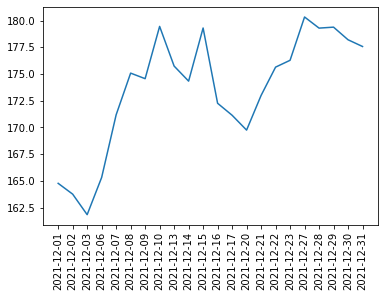

In [15]:
plt.figure()
#x = AAPL_TICKER_DEC21['date']
#y = AAPL_TICKER_DEC21['close']
#plt.plot(x,y)
#plt.xticks(rotation='vertical')
plt.plot(AAPL_TICKER_DEC21['date'],AAPL_TICKER_DEC21['close'])
plt.xticks(rotation='vertical')